In [1]:
%cd ../
%cd O2O-Text-Analysis-project

/home/work/TextDataAnalysis/O2O-Text-Analysis-project
[Errno 2] No such file or directory: 'O2O-Text-Analysis-project'
/home/work/TextDataAnalysis/O2O-Text-Analysis-project


In [2]:
import pandas as pd
import numpy as np

In [3]:
kakao_df = pd.read_csv('result/kakao_taxi_sentiment_analyzed_with_model.csv')
uber_df = pd.read_csv('result/uber_taxi_sentiment_analyzed_with_model.csv')
yogiyo_df = pd.read_csv('result/yogiyo_sentiment_analyzed_with_model.csv')
skyscanner_df = pd.read_csv('result/skyscanner_sentiment_analyzed_with_model.csv')
yeogi_df = pd.read_csv('result/yeogi_sentiment_analyzed_with_model.csv')
nol_df = pd.read_csv('result/nol_sentiment_analyzed_with_model.csv')

In [4]:
kakao_df

,date,score,text,sentiment
0,2025-04-19,1,최악 바이크 요금 더 받으려고 일부러 서비스 종료에서 오류 만들어 두는 것 같음 분...,9
1,2025-05-08,1,카카오택시 내비게이션이 이상합니다 제가 가는 거리에 맞춰 최단거리라고 설정해 놨는데...,9
2,2025-03-12,3,업데이트 좀 하셈 저번보다 나아지긴해도 택시가 오기까지 위치가 고정되어 있는 것은 ...,9
3,2025-05-14,1,오류인지 자꾸 어플 켠 적도 없는 데 택시 배차가 되었다고 뜨고 기사님께 전화가 옵...,9
4,2025-04-24,3,퀵을 물건 보낼 것 있는데 급할 때 이용하곤하는데 오토바이 퀵을 선택했어도 차량이 ...,9
...,...,...,...,...
9349,2025-04-06,5,기사 호출 후 앱이 멈춰서 지금 계속 기사들만 새로 잡히고 전화 오고 난리에요 고객...,9
9350,2025-04-05,5,우버 현 상황 괞 찮 습니다 항상 현재 되로 하세요,5
9351,2025-04-03,4,사용하기 너무 편함 프러모션도 있고 사용하기 너무 좋네요,0
9352,2025-04-01,1,네 비 네 비 길을 진짜 이상하게 알려 줘요 분이면 가는 거리를 분 정도 돌아가게하...,9


In [5]:
# 평점이 2 이하이면 부정 리뷰, 3이면 감정 없는 리뷰, # 4점 이상이면 긍정 리뷰로 간주

def map_score_to_polarity(score):
    if score <= 2:
        return "negative"
    elif score == 3:
        return "neutral"
    else:
        return "positive"

# 감정 id가 0~4에 속하면 긍정, 5,6에 속하면 감정 없는 리뷰, 7~10에 속하면 부정 리뷰로 간주
def map_sentiment_id_to_polarity(sentiment):
    if sentiment in [0, 1, 2, 3, 4]:
        return "positive"
    elif sentiment in [5, 6]:
        return "neutral"
    else:
        return "negative"

'''
    # 긍정 ----------------
    0: "기쁨(행복한)",
    1: "고마운",
    2: "설레는(기대하는)",
    3: "사랑하는",
    4: "즐거운(신나는)",
    # 일반 ----------------
    5: "일상적인",
    6: "생각이 많은",
    # 부정 ----------------
    7: "슬픔(우울한)",
    8: "힘듦(지침)",
    9: "짜증남",
    10: "걱정스러운(불안한)"
'''

'\n    # 긍정 ----------------\n    0: "기쁨(행복한)",\n    1: "고마운",\n    2: "설레는(기대하는)",\n    3: "사랑하는",\n    4: "즐거운(신나는)",\n    # 일반 ----------------\n    5: "일상적인",\n    6: "생각이 많은",\n    # 부정 ----------------\n    7: "슬픔(우울한)",\n    8: "힘듦(지침)",\n    9: "짜증남",\n    10: "걱정스러운(불안한)"\n'

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False

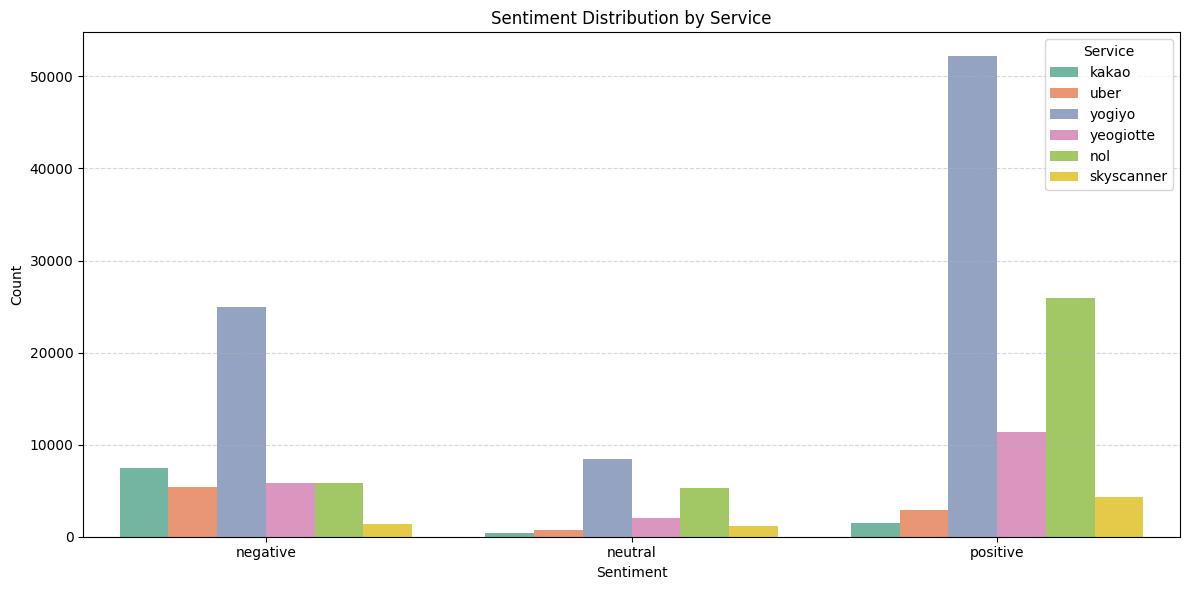

In [8]:
# 감정 분포 결과 반환 함수
def get_sent_result(df, service_name):
    df['senti_label'] = df['sentiment'].apply(map_sentiment_id_to_polarity)
    counts = df.groupby('senti_label')['sentiment'].count().reset_index()
    counts['service'] = service_name
    counts.rename(columns={'sentiment': 'count'}, inplace=True)
    return counts

# 모든 서비스 결과 수집
result_list = []
for df, name in [
    (kakao_df, 'kakao'),
    (uber_df, 'uber'),
    (yogiyo_df, 'yogiyo'),
    (yeogi_df, 'yeogiotte'),
    (nol_df, 'nol'),
    (skyscanner_df, 'skyscanner'),
]:
    result_list.append(get_sent_result(df, name))

# 결과 통합
final_df = pd.concat(result_list, ignore_index=True)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=final_df, x='senti_label', y='count', hue='service', palette='Set2')

plt.title('Sentiment Distribution by Service')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Service')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('result/sentment_analysis_by_model_bar_graph.png')

<ipython-input-10-4b599baf081b>:39: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  plt.tight_layout()
<ipython-input-10-4b599baf081b>:39: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  plt.tight_layout()
<ipython-input-10-4b599baf081b>:39: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  plt.tight_layout()
<ipython-input-10-4b599baf081b>:39: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-10-4b599baf081b>:39: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  plt.tight_layout()
<ipython-input-10-4b599baf081b>:39: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-10-4b599baf081b>:39: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
<ipython-input-10-4b599baf081b>:39: UserWarning: Gly

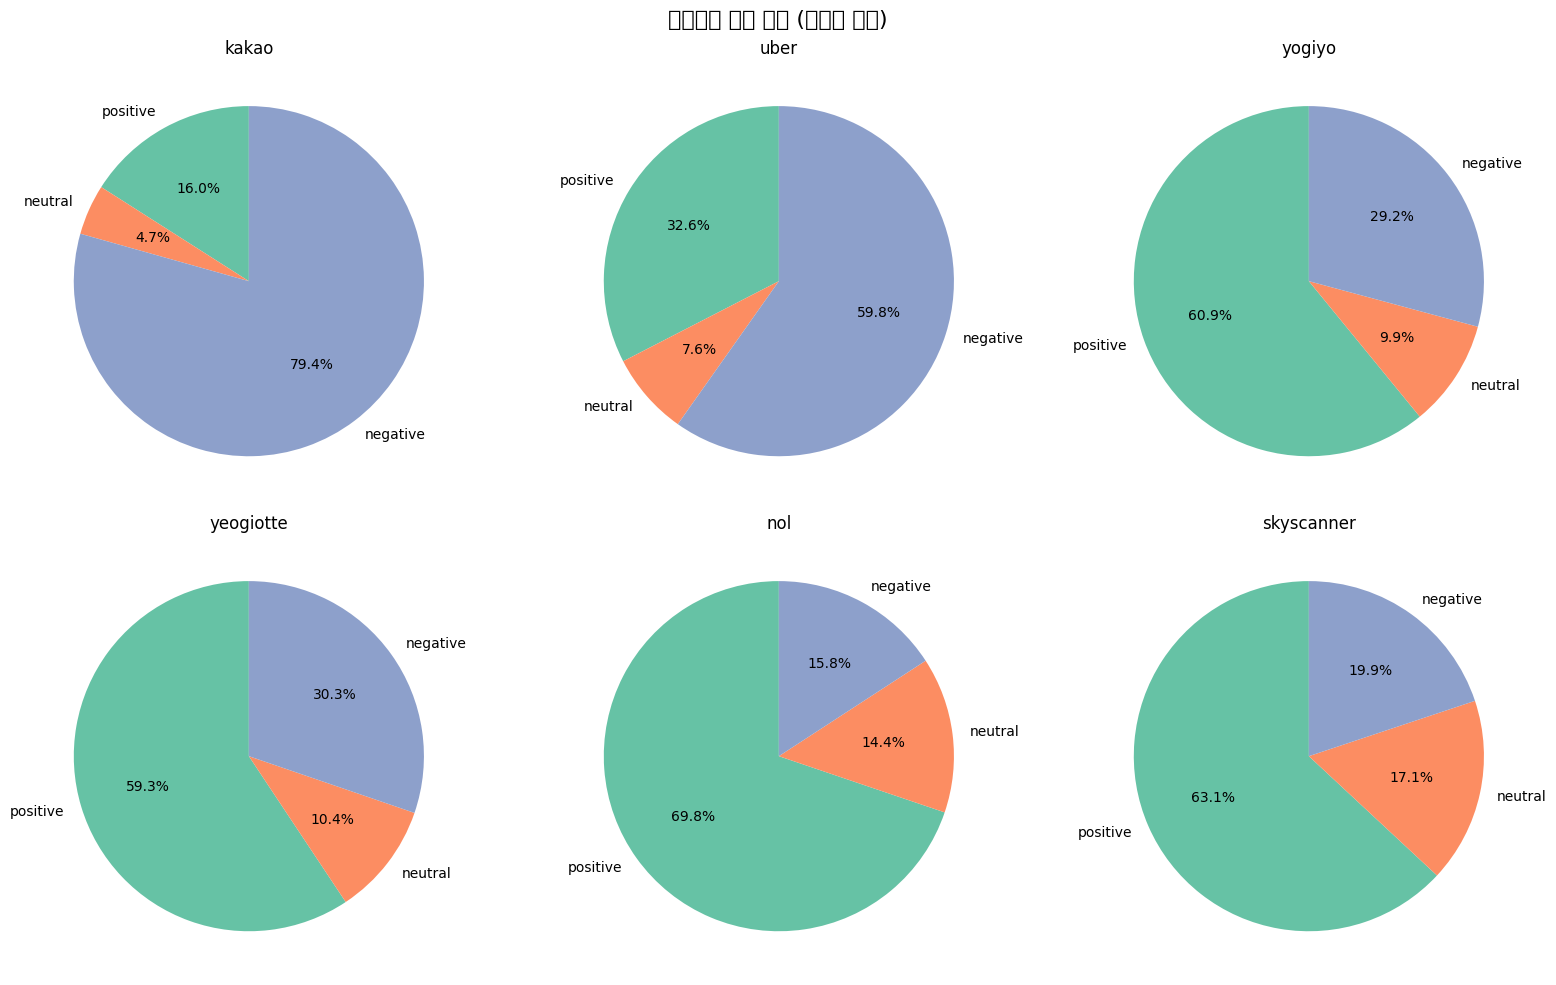

In [10]:
# 감정 레이블 순서 및 색상 지정
senti_order = ['positive', 'neutral', 'negative']
color_map = {'positive': '#66c2a5', 'neutral': '#fc8d62', 'negative': '#8da0cb'}

# 고유 서비스 목록
services = final_df['service'].unique()

# 서브플롯 생성 (3행 4열, 총 12칸)
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# 각 서비스별 파이차트 반복 생성
for idx, service in enumerate(services):
    ax = axes[idx]
    
    # 해당 서비스 데이터 필터링 및 순서 정렬
    data = final_df[final_df['service'] == service].set_index('senti_label').reindex(senti_order).fillna(0)
    
    labels = data.index
    sizes = data['count']
    colors = [color_map[label] for label in labels]

    # 파이차트 그리기
    ax.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        textprops={'fontsize': 10}
    )
    ax.set_title(service, fontsize=12)

# 남는 subplot은 지우기
for i in range(len(services), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("서비스별 감정 분포 (퍼센트 기준)", fontsize=16)
plt.tight_layout()
plt.savefig('result/sentment_analysis_by_model_분포.png')


In [14]:
get_sent_result(kakao_df)

senti_label
negative    7424
neutral      436
positive    1494
Name: sentiment, dtype: int64